In [1]:
import pycaret as py
import pandas as pd

Data Loading

In [2]:
data=pd.read_excel("D://XParams.xlsx",sheet_name='FinalData')
data.columns=['Date','AvgTemp','AvgTempFeelLike','AvgHumidity','AvgWindspeed','AvgRainfall','UnemploymentRate','Demand']
data

Date    AvgTemp  AvgTempFeelLike  AvgHumidity  AvgWindspeed  \
0   2010-01-01  12.716129        12.470968    82.951613     12.967742   
1   2010-02-01  18.321429        18.260714    64.260714     17.603571   
2   2010-03-01  26.306452        25.796774    47.503226     17.970968   
3   2010-04-01  33.343333        31.876667    23.380000     21.610000   
4   2010-05-01  34.925806        34.829032    31.329032     22.329032   
..         ...        ...              ...          ...           ...   
145 2022-02-01  17.057143        17.042857    71.653571     15.696429   
146 2022-03-01  25.561290        25.406452    56.387097     16.977419   
147 2022-04-01  32.523333        30.970000    24.743333     18.663333   
148 2022-05-01  33.335484        34.729032    44.229032     20.712903   
149 2022-06-01  38.115789        37.689474    23.636842     24.605263   

     AvgRainfall  UnemploymentRate  Demand  
0       0.193548               7.4    3678  
1       1.075000               8.8    3196  
2       0.006452               8.6    3411  
3       0.175000               8.7    4131  
4       0.000000               8.0    4628  
..           ...               ...     ...  
145     1.775000               3.8    4985  
146     1.160000               3.5    4648  
147     0.025000               3.0    6197  
148    13.050000               3.1    7070  
149     4.160000               3.2    7695  

[150 rows x 8 columns]

Feature Engineering for Month,Year and Series

In [3]:
import numpy as np
# extract month and year from dates
data['Month'] = [i.month for i in data['Date']]
data['Year'] = [i.year for i in data['Date']]
# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
#data.drop(['Date'], axis=1, inplace=True)
#data = data[['Series', 'Year', 'Month', 'Rainfall']] 
# check the head of the dataset
data.head()

Date    AvgTemp  AvgTempFeelLike  AvgHumidity  AvgWindspeed  \
0 2010-01-01  12.716129        12.470968    82.951613     12.967742   
1 2010-02-01  18.321429        18.260714    64.260714     17.603571   
2 2010-03-01  26.306452        25.796774    47.503226     17.970968   
3 2010-04-01  33.343333        31.876667    23.380000     21.610000   
4 2010-05-01  34.925806        34.829032    31.329032     22.329032   

   AvgRainfall  UnemploymentRate  Demand  Month  Year  Series  
0     0.193548               7.4    3678      1  2010       1  
1     1.075000               8.8    3196      2  2010       2  
2     0.006452               8.6    3411      3  2010       3  
3     0.175000               8.7    4131      4  2010       4  
4     0.000000               8.0    4628      5  2010       5

In [4]:
finalDf=data[['Date','Series','Month','Year','AvgTemp','AvgTempFeelLike','AvgHumidity','AvgWindspeed','AvgRainfall','UnemploymentRate','Demand']]

In [5]:
finalDf

Date  Series  Month  Year    AvgTemp  AvgTempFeelLike  AvgHumidity  \
0   2010-01-01       1      1  2010  12.716129        12.470968    82.951613   
1   2010-02-01       2      2  2010  18.321429        18.260714    64.260714   
2   2010-03-01       3      3  2010  26.306452        25.796774    47.503226   
3   2010-04-01       4      4  2010  33.343333        31.876667    23.380000   
4   2010-05-01       5      5  2010  34.925806        34.829032    31.329032   
..         ...     ...    ...   ...        ...              ...          ...   
145 2022-02-01     146      2  2022  17.057143        17.042857    71.653571   
146 2022-03-01     147      3  2022  25.561290        25.406452    56.387097   
147 2022-04-01     148      4  2022  32.523333        30.970000    24.743333   
148 2022-05-01     149      5  2022  33.335484        34.729032    44.229032   
149 2022-06-01     150      6  2022  38.115789        37.689474    23.636842   

     AvgWindspeed  AvgRainfall  UnemploymentRate  Demand  
0       12.967742     0.193548               7.4    3678  
1       17.603571     1.075000               8.8    3196  
2       17.970968     0.006452               8.6    3411  
3       21.610000     0.175000               8.7    4131  
4       22.329032     0.000000               8.0    4628  
..            ...          ...               ...     ...  
145     15.696429     1.775000               3.8    4985  
146     16.977419     1.160000               3.5    4648  
147     18.663333     0.025000               3.0    6197  
148     20.712903    13.050000               3.1    7070  
149     24.605263     4.160000               3.2    7695  

[150 rows x 11 columns]

In [7]:
TempData=finalDf[['Series','Month','Year','AvgTemp']]
HumidityData=finalDf[['Series','Month','Year','AvgHumidity']]
WindSpeedData=finalDf[['Series','Month','Year', 'AvgWindspeed']]
RainfallData=finalDf[['Series','Month','Year','AvgRainfall']]
UnemploymentRateData=finalDf[['Series','Month','Year','UnemploymentRate']]
DemandData=finalDf[['Series','Month','Year','Demand']]

EDA

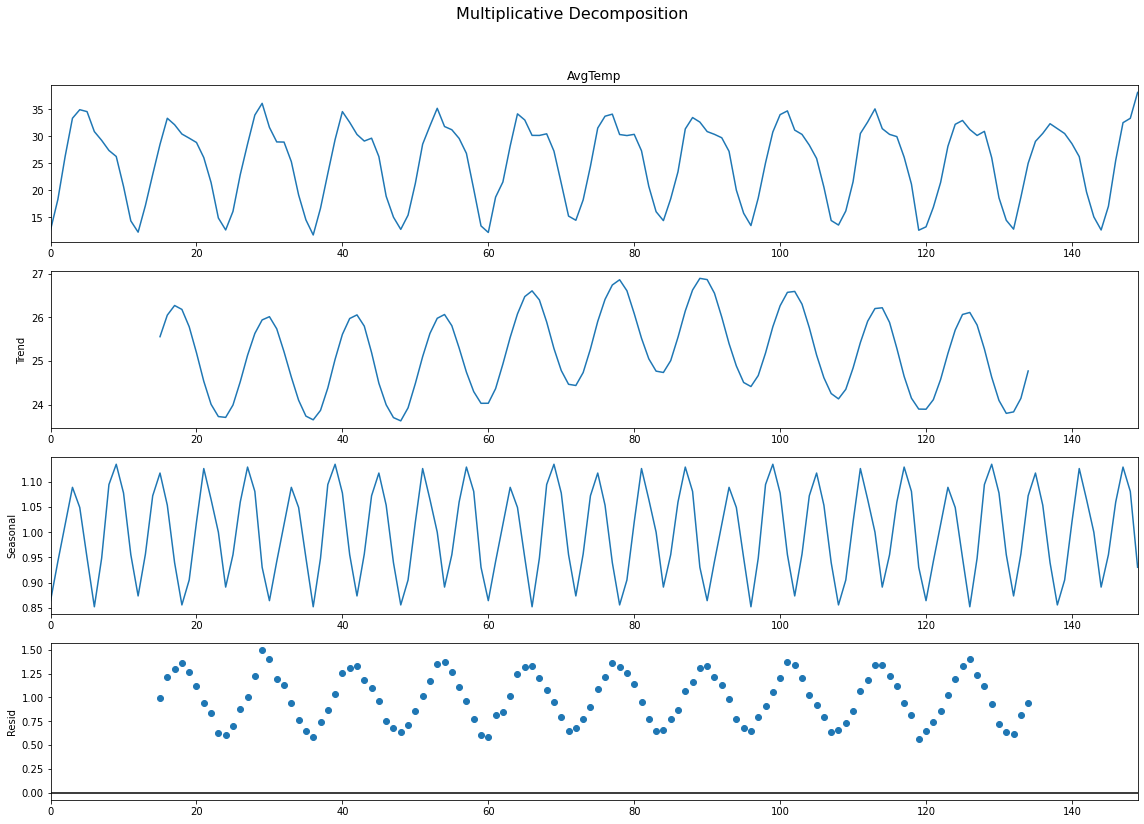

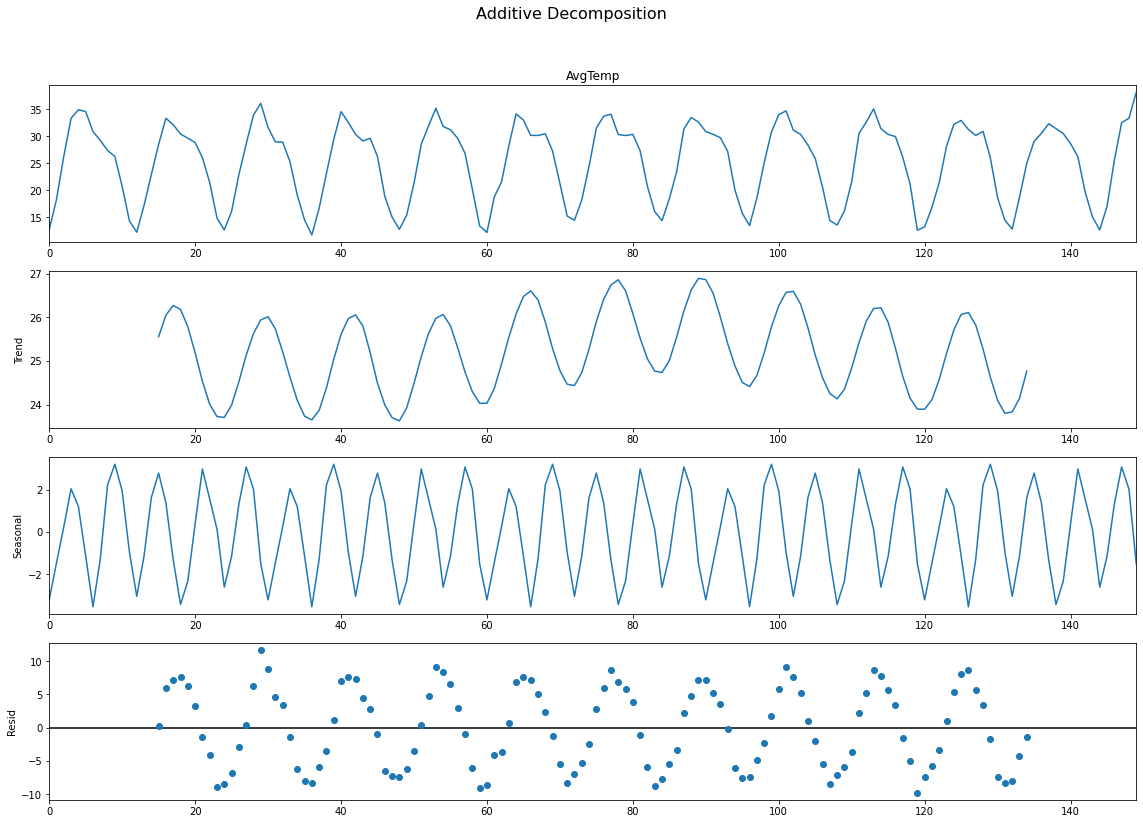

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline

#Temperature
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(TempData['AvgTemp'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(TempData['AvgTemp'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

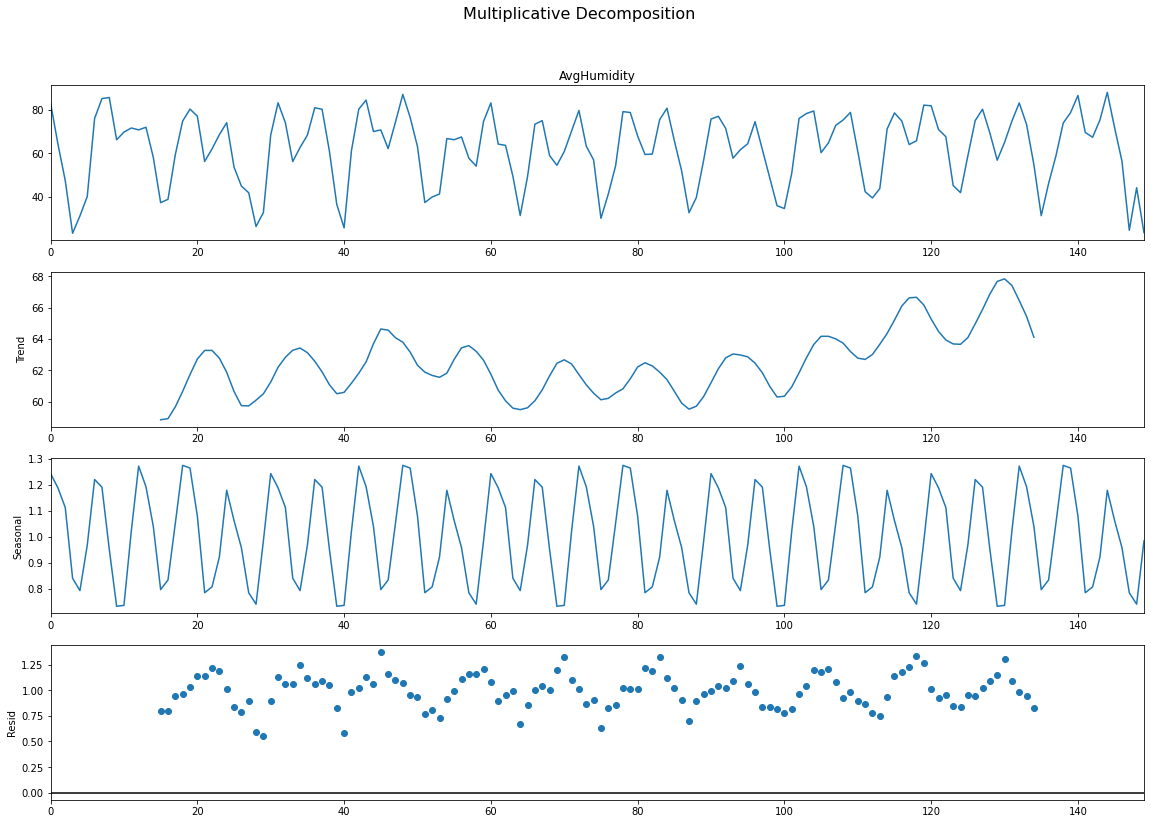

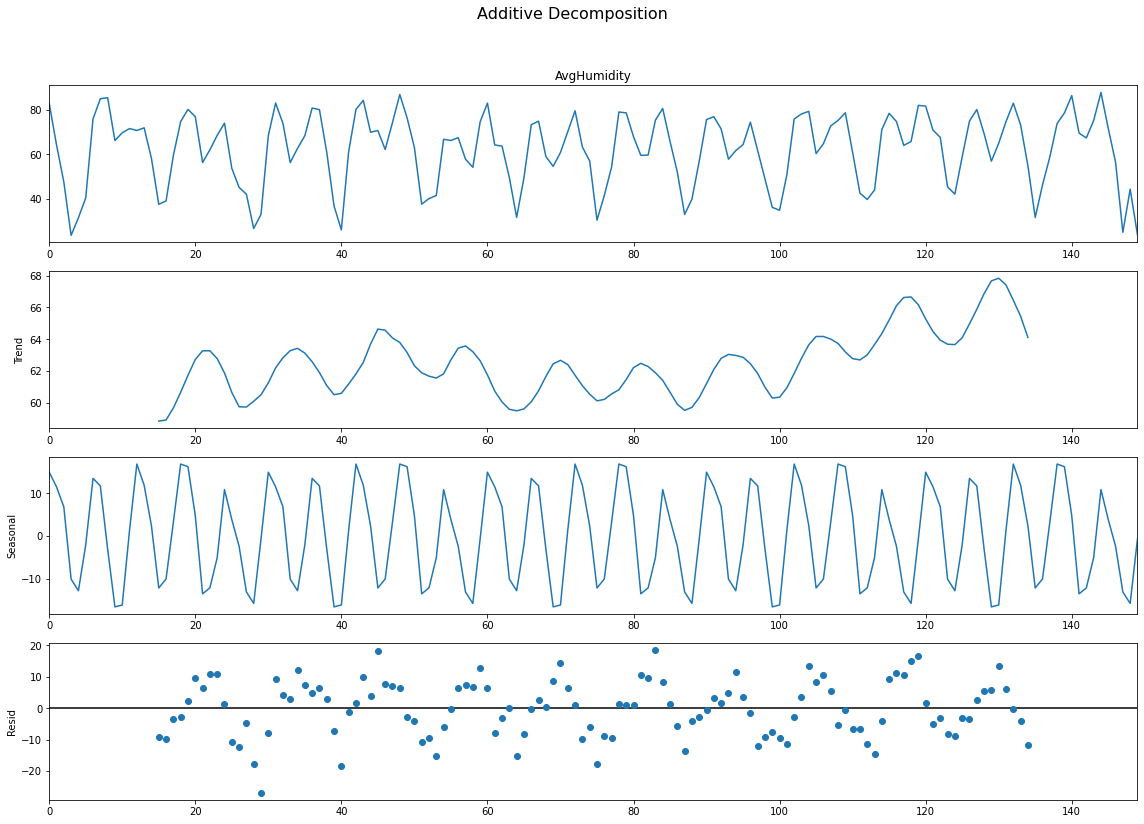

In [9]:
#Humidity
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(HumidityData['AvgHumidity'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(HumidityData['AvgHumidity'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

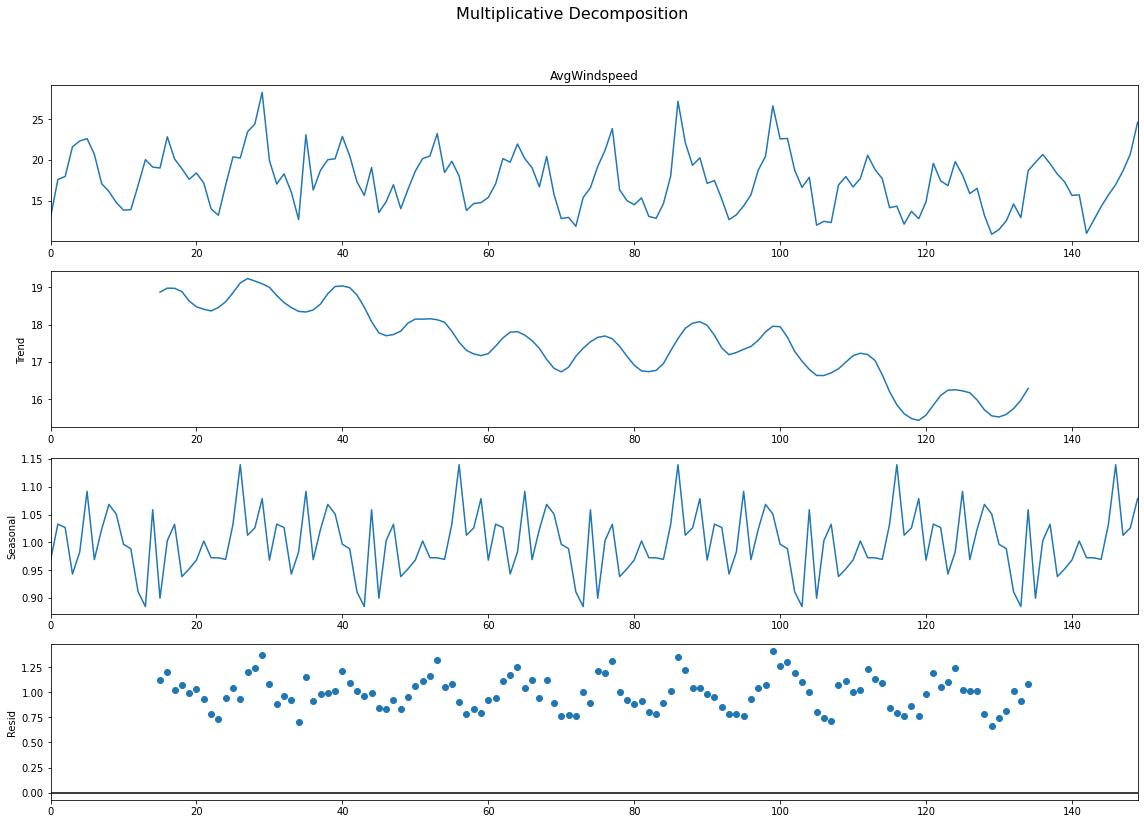

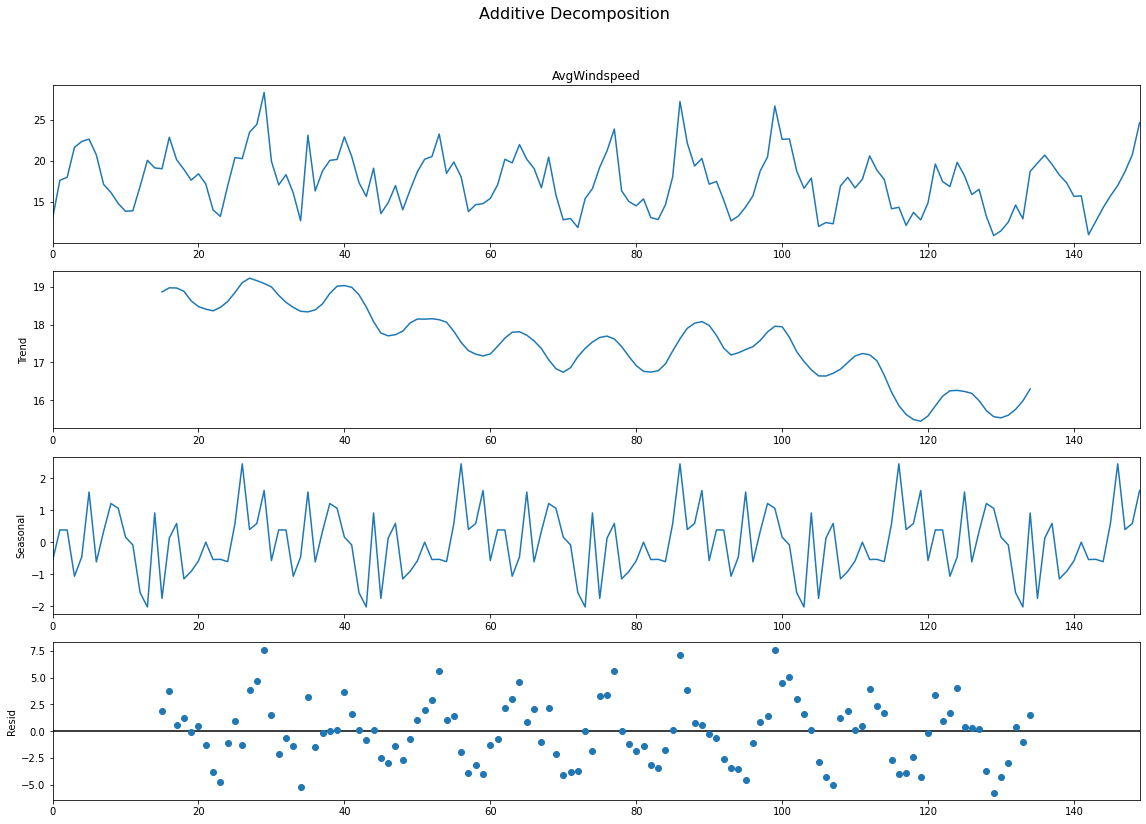

In [10]:
#Windspeed
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(WindSpeedData['AvgWindspeed'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(WindSpeedData['AvgWindspeed'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

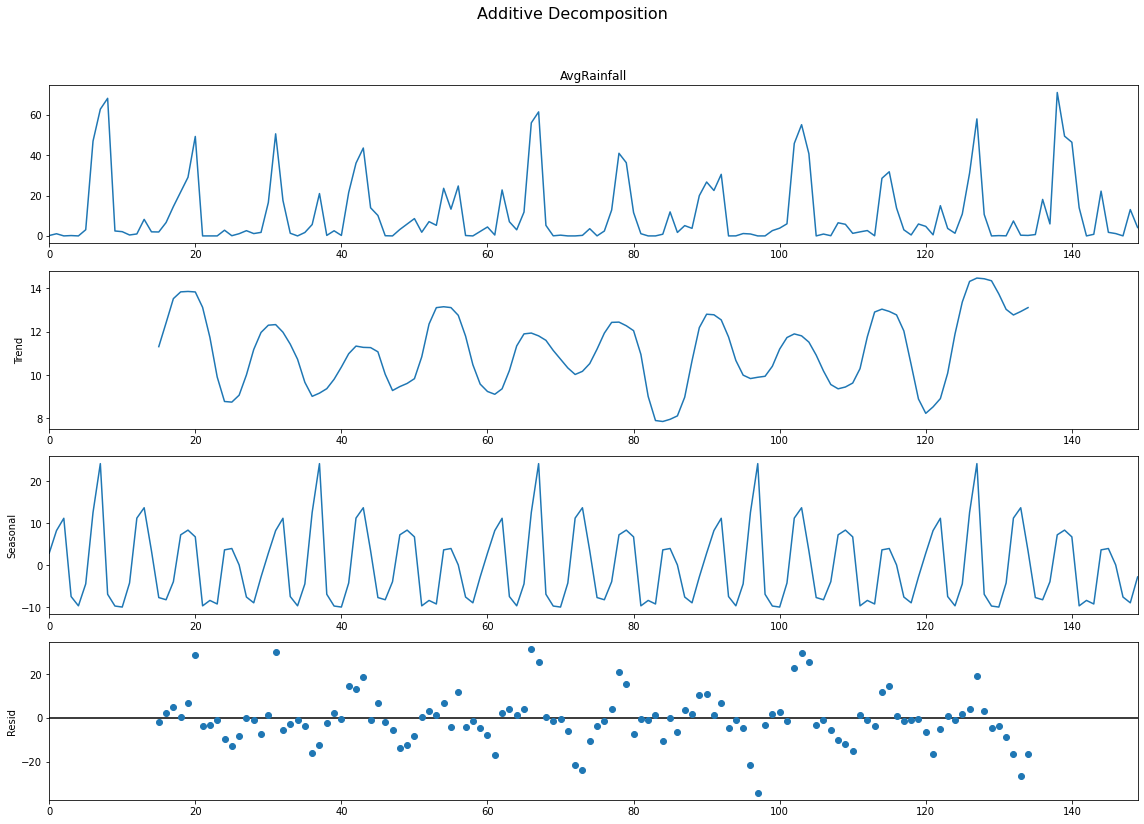

In [11]:
#Rainfall
# Additive Decomposition
additive_decomposition = seasonal_decompose(RainfallData['AvgRainfall'], model='additive', period=30)


additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

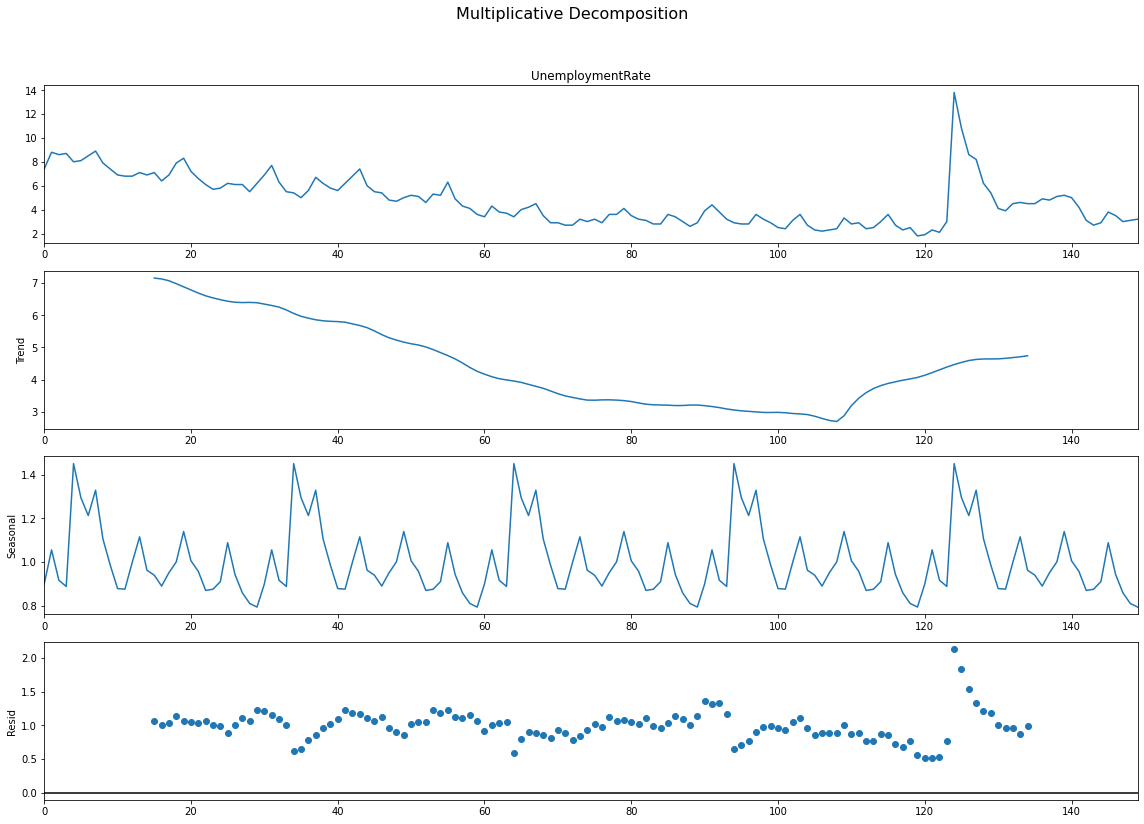

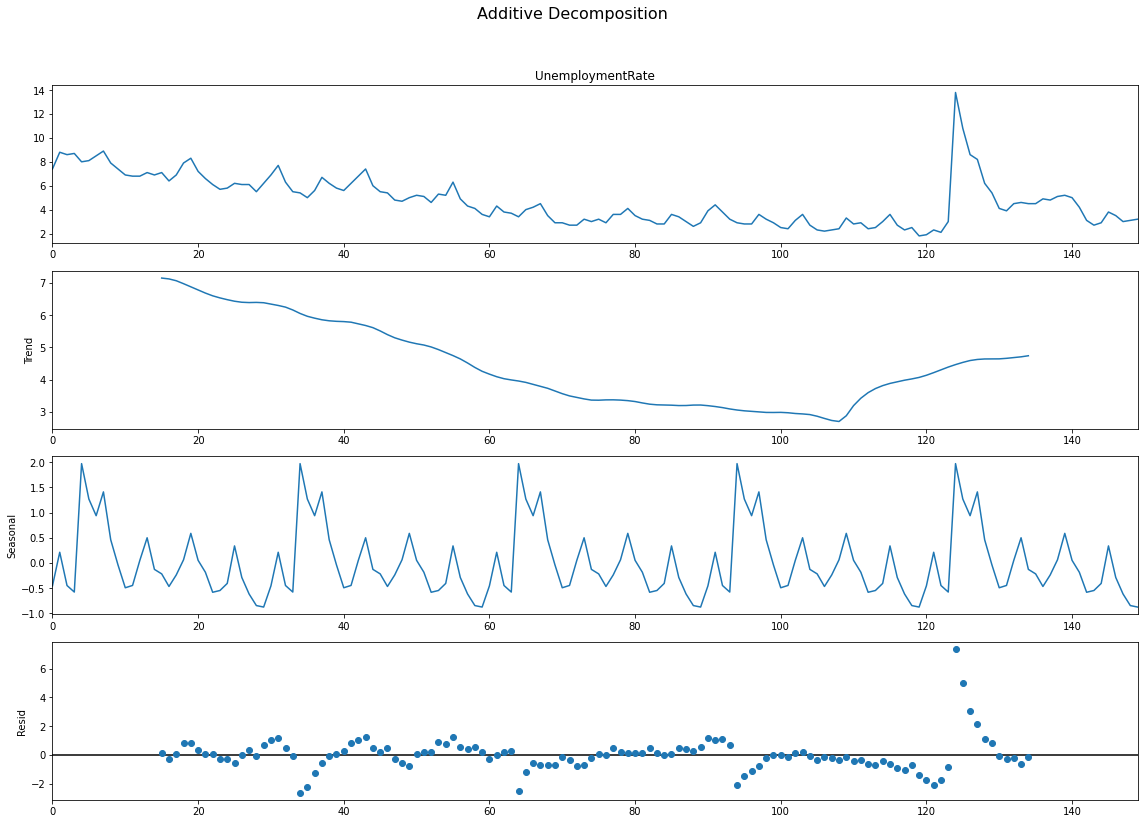

In [12]:
#Unemployment Rate
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(UnemploymentRateData['UnemploymentRate'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(UnemploymentRateData['UnemploymentRate'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

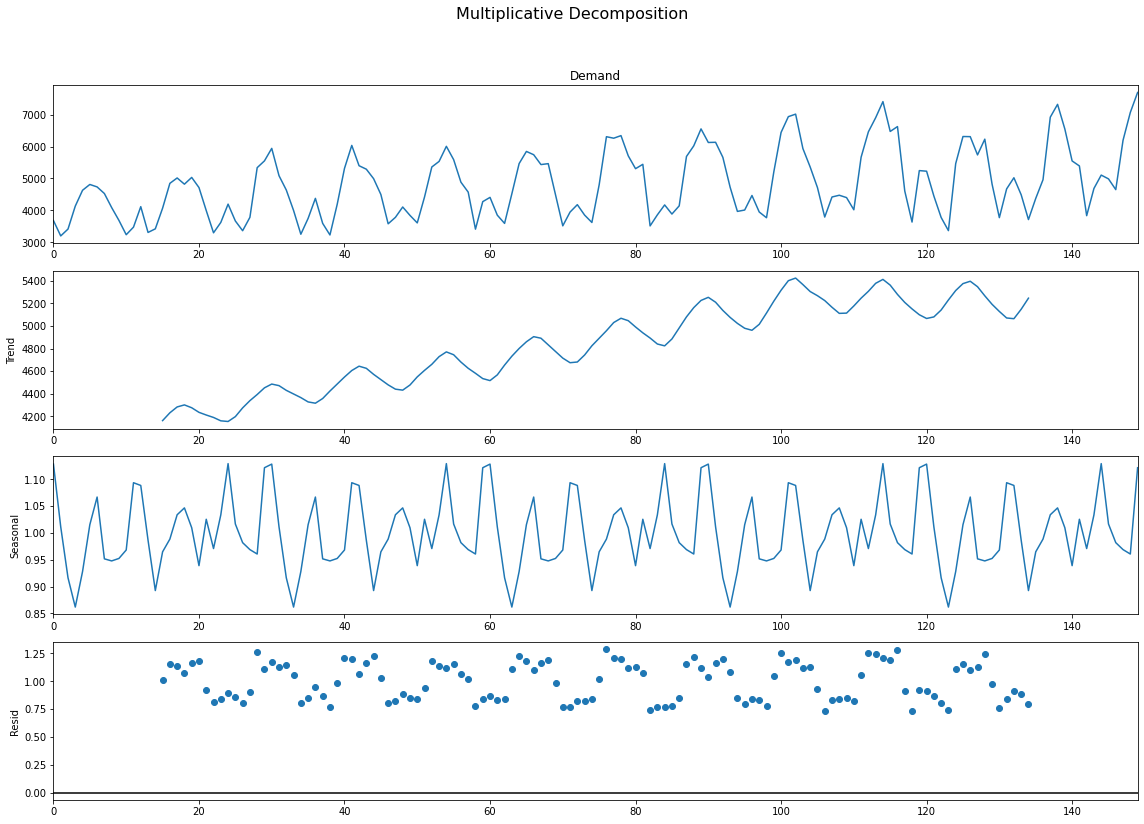

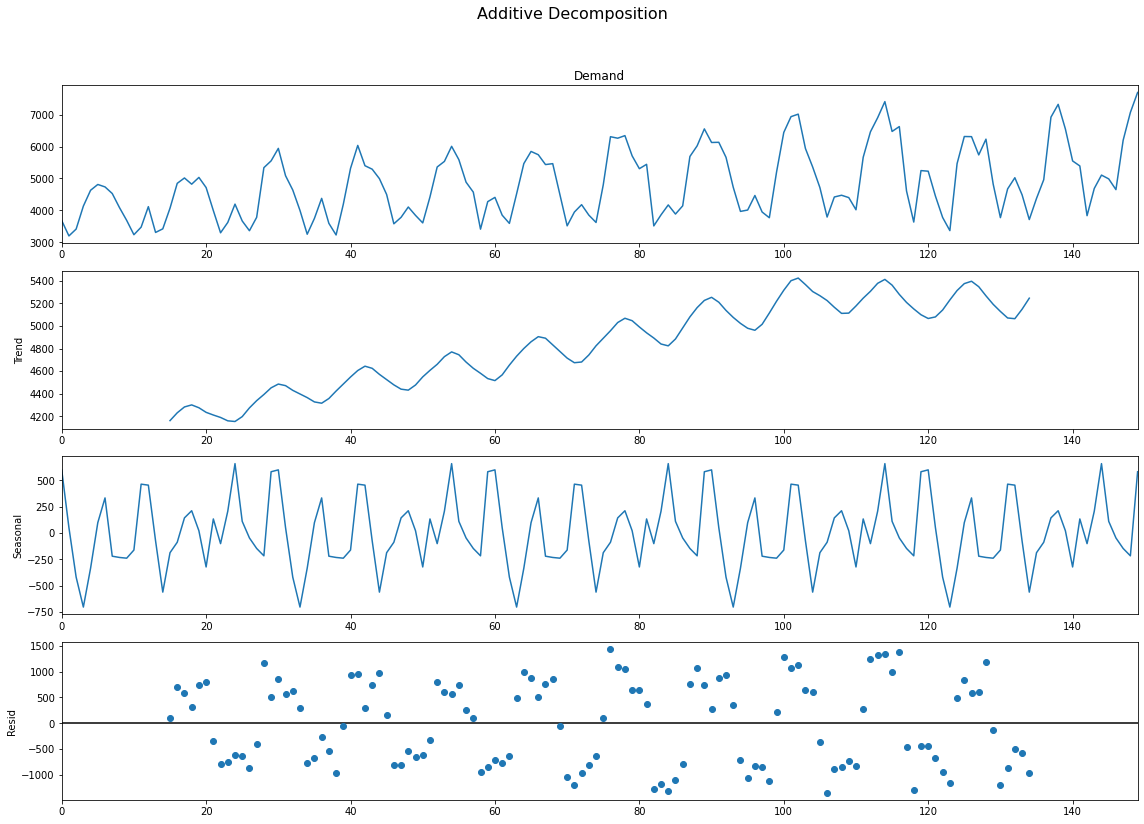

In [13]:
#Demand
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(DemandData['Demand'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(DemandData['Demand'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [14]:
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=finalDf['Date'], y=finalDf['Demand'], name="Demand data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=finalDf['Date'], y=finalDf['AvgTemp'], name="Temp data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Demand-Avg Temp Curve",width=900,height=400
)

# Set x-axis title
fig.update_xaxes(title_text="Demand-Avg Temp Curve")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Demand</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Avg Temperature</b>", secondary_y=True)

fig.show()


In [15]:
finalDf.drop(['Date'],axis=1,inplace=True)


D:\User\snamjoshi\AppData\Local\Temp\ipykernel_5504\273013640.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Temperature Analysis-Temperature Model Creation and Evaluation

In [16]:
# split data into train-test set

traintemp = TempData[TempData['Series'] < 139]
testtemp = TempData[TempData['Series'] >= 139]
# check shape
traintemp.shape, testtemp.shape

((138, 4), (12, 4))

In [17]:
# import the regression module
from pycaret.regression import *
# initialize setup
s_temp = setup(data = traintemp, test_data = testtemp, target = 'AvgTemp', fold_strategy = 'timeseries',numeric_features = ['Year', 'Series'], fold = 3, session_id = 100,log_experiment=True,experiment_name='Temperature')

In [18]:
best = compare_models(sort = 'MAPE')

In [19]:
prediction_holdout = predict_model(best,drift_report=True);

Extra Trees Regressor_Drift_Report_Regression.html saved successfully.


In [20]:
# generate predictions on the original dataset
import plotly.express as px
predictions = predict_model(best, data=TempData)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["AvgTemp", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

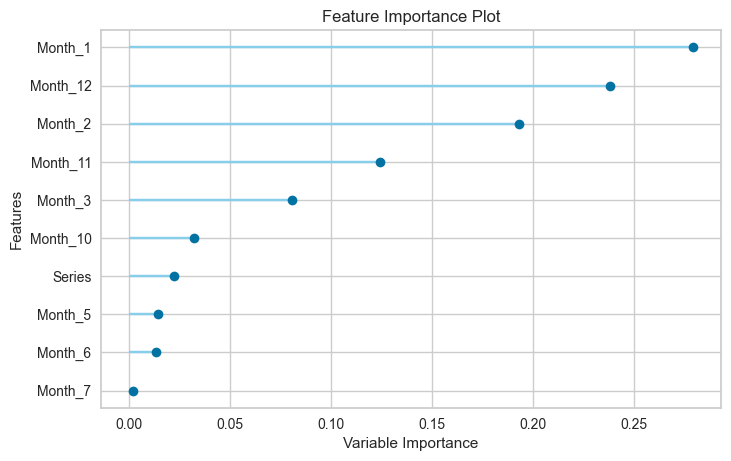

In [21]:
# check feature importance**
plot_model(best, plot = 'feature')

In [22]:
final_best = finalize_model(best)

In [23]:
save_model(final_best, 'TemperatureForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year', 'Series'],
                                       target='AvgTemp', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                   

Model Explainability

In [24]:
saved_model = load_model('TemperatureForecastingModel')

Transformation Pipeline and Model Successfully Loaded


In [25]:
import shap
shap.initjs()

In [26]:
train_pipe = saved_model[:-1].transform(traintemp)
saved_model.named_steps['trained_model']
explainer = shap.TreeExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [27]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [28]:
evaluate_model(final_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Humidity Analysis-Humidity Model Creation and Evaluation

In [29]:
# split data into train-test set
trainhumidity = HumidityData[HumidityData['Series'] < 139]
testhumidity = HumidityData[HumidityData['Series'] >= 139]
# check shape
trainhumidity.shape, testhumidity.shape

((138, 4), (12, 4))

In [30]:
# initialize setup
s_humidity = setup(data = trainhumidity, test_data = testhumidity, target = 'AvgHumidity', fold_strategy = 'timeseries',numeric_features = ['Year', 'Series'], fold = 3, session_id = 101,log_experiment=True,experiment_name='Humidity')

In [31]:
best = compare_models(sort = 'MAPE')

In [32]:
prediction_holdout = predict_model(best,drift_report=True);

Ridge Regression_Drift_Report_Regression.html saved successfully.


In [33]:
# generate predictions on the original dataset
predictions = predict_model(best, data=HumidityData)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["AvgHumidity", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

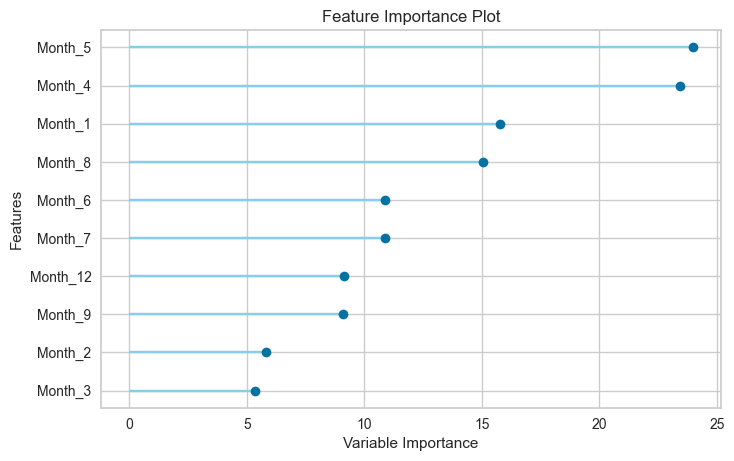

In [34]:
# check feature importance**
plot_model(best, plot = 'feature')

In [35]:
final_best = finalize_model(best)

In [36]:
save_model(final_best, 'HumidityForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year', 'Series'],
                                       target='AvgHumidity', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                 ('dummy', Dummify(target='AvgHumidity')),
                 ('fix_perfect', Remove_100(target='AvgHumidity')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

Model Explainability

In [37]:
saved_model = load_model('HumidityForecastingModel')

Transformation Pipeline and Model Successfully Loaded


In [38]:
train_pipe = saved_model[:-1].transform(trainhumidity)
saved_model.named_steps['trained_model']
explainer = shap.LinearExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [39]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [40]:
evaluate_model(final_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Windspeed Analysis-Windspeed Model Creation and Evaluation

In [41]:
# split data into train-test set
trainwindspeed = WindSpeedData[WindSpeedData['Series'] < 139]
testwindspeed = WindSpeedData[WindSpeedData['Series'] >= 139]
# check shape
trainwindspeed.shape, testwindspeed.shape

((138, 4), (12, 4))

In [42]:
# initialize setup
s_windspeed = setup(data = trainwindspeed, test_data = testwindspeed, target = 'AvgWindspeed', fold_strategy = 'timeseries',numeric_features = ['Year', 'Series'], fold = 3, session_id = 102,log_experiment=True,experiment_name='WindSpeed')

In [43]:
best = compare_models(sort = 'MAPE')

In [44]:
prediction_holdout = predict_model(best,drift_report=True);

Huber Regressor_Drift_Report_Regression.html saved successfully.


In [45]:
# generate predictions on the original dataset
predictions = predict_model(best, data=WindSpeedData)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["AvgWindspeed", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

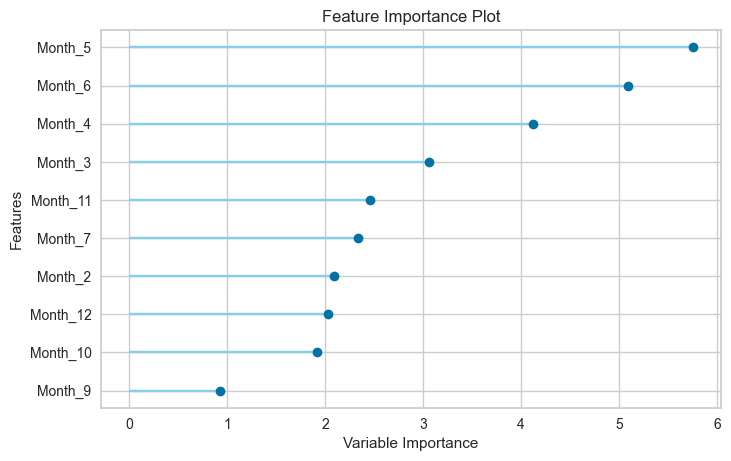

In [46]:
# check feature importance**
plot_model(best, plot = 'feature')

In [47]:
final_best = finalize_model(best)

In [48]:
save_model(final_best, 'AvgWindspeedForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year', 'Series'],
                                       target='AvgWindspeed',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=N...
                 ('dummy', Dummify(target='AvgWindspeed')),
                 ('fix_perfect', Remove_100(target='AvgWindspeed')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), 

Model Explainability

In [49]:
saved_model = load_model('AvgWindspeedForecastingModel')

Transformation Pipeline and Model Successfully Loaded


In [50]:
train_pipe = saved_model[:-1].transform(trainwindspeed)
saved_model.named_steps['trained_model']
explainer = shap.LinearExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [51]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [52]:
evaluate_model(final_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Rainfall Analysis-Rainfall Model Creation and Evaluation

In [53]:
# split data into train-test set
trainRainfall = RainfallData[RainfallData['Series'] < 139]
testRainfall = RainfallData[RainfallData['Series'] >= 139]
# check shape
trainRainfall.shape, testRainfall.shape

((138, 4), (12, 4))

In [54]:
# initialize setup
s_rainfall = setup(data = trainRainfall, test_data = testRainfall, target = 'AvgRainfall', fold_strategy = 'timeseries',numeric_features = ['Year', 'Series'], fold = 3, session_id = 103,log_experiment=True,experiment_name='Rainfall')

In [55]:
best = compare_models(sort = 'MAPE')

Model Overfitting and hence taking 3rd model in the top three

In [56]:
lr = create_model('et')

In [57]:
tuned_dt = tune_model(lr)

In [58]:
prediction_holdout = predict_model(tuned_dt,drift_report=True);

Extra Trees Regressor_Drift_Report_Regression.html saved successfully.


In [59]:
# generate predictions on the original dataset
predictions = predict_model(tuned_dt,data=RainfallData)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["AvgRainfall", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

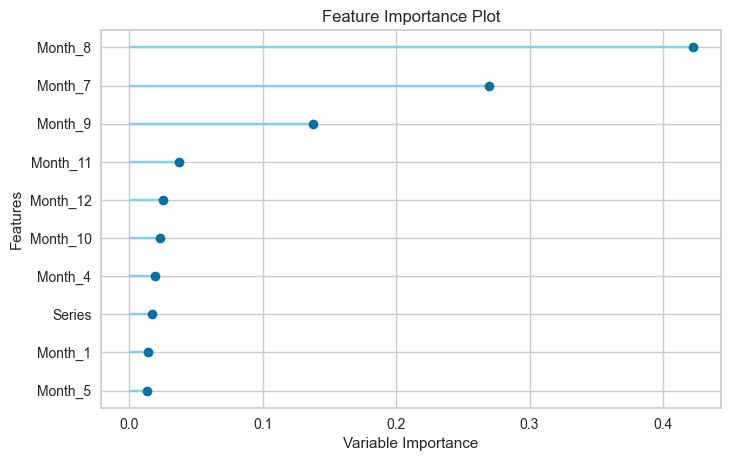

In [60]:
# check feature importance**
plot_model(tuned_dt, plot = 'feature')

In [61]:
final_best = finalize_model(tuned_dt)

In [62]:
save_model(final_best, 'AvgRainfallForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year', 'Series'],
                                       target='AvgRainfall', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=6,
                                      max_features='log2', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0002,
     

Model Explainability

In [63]:
saved_model=load_model('AvgRainfallForecastingModel')

Transformation Pipeline and Model Successfully Loaded


In [64]:
train_pipe = saved_model[:-1].transform(trainRainfall)
saved_model.named_steps['trained_model']
explainer = shap.TreeExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [65]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [66]:
evaluate_model(final_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Unemployment Rate Analysis-Unemployment Rate Model Creation and Evaluation

In [67]:
# split data into train-test set
trainUR = UnemploymentRateData[UnemploymentRateData['Series'] < 139]
testUR = UnemploymentRateData[UnemploymentRateData['Series'] >= 139]
# check shape
trainUR.shape, testUR.shape

((138, 4), (12, 4))

In [68]:
# initialize setup
s_UR = setup(data = trainUR, test_data = testUR, target = 'UnemploymentRate', fold_strategy = 'timeseries',numeric_features = ['Year', 'Series'], fold = 3, session_id = 104,log_experiment=True,experiment_name='UnemploymentRate')

In [69]:
best = compare_models(sort = 'MAPE')

In [70]:
prediction_holdout = predict_model(best,drift_report=True);

Gradient Boosting Regressor_Drift_Report_Regression.html saved successfully.


In [71]:
# generate predictions on the original dataset
predictions = predict_model(best, data=UnemploymentRateData)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["UnemploymentRate", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

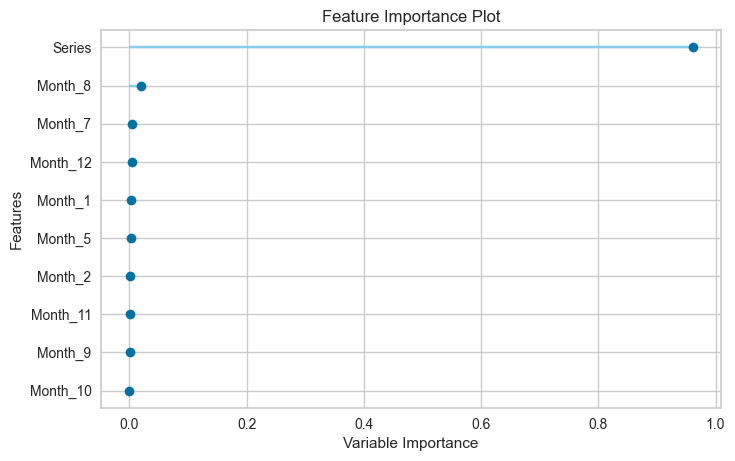

In [72]:
# check feature importance**
plot_model(best, plot = 'feature')

In [73]:
final_best = finalize_model(best)

In [74]:
save_model(final_best, 'URForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Year', 'Series'],
                                       target='UnemploymentRate',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numeric...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                     

Model Explainability

In [75]:
saved_model=load_model('URForecastingModel')

Transformation Pipeline and Model Successfully Loaded


In [76]:
train_pipe = saved_model[:-1].transform(trainUR)
saved_model.named_steps['trained_model']
explainer = shap.TreeExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [77]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [78]:
evaluate_model(final_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Demand/Consumption Analysis-Demand/Consumption Model Creation and Evaluation

In [108]:
# split data into train-test set
train = finalDf[finalDf['Series'] < 121]
test = finalDf[finalDf['Series'] >= 121]
# check shape
train.shape, test.shape


((120, 9), (30, 9))

In [109]:
train

Series  Month  Year    AvgTemp  AvgHumidity  AvgWindspeed  AvgRainfall  \
0         1      1  2010  12.716129    82.951613     12.967742     0.193548   
1         2      2  2010  18.321429    64.260714     17.603571     1.075000   
2         3      3  2010  26.306452    47.503226     17.970968     0.006452   
3         4      4  2010  33.343333    23.380000     21.610000     0.175000   
4         5      5  2010  34.925806    31.329032     22.329032     0.000000   
..      ...    ...   ...        ...          ...           ...          ...   
115     116      8  2019  30.358065    78.474194     14.138710    31.775000   
116     117      9  2019  29.946667    74.756667     14.326667    13.800000   
117     118     10  2019  26.141935    63.996774     12.122581     3.020000   
118     119     11  2019  21.160000    65.720000     13.700000     0.475000   
119     120     12  2019  12.632258    82.041935     12.790323     5.900000   

     UnemploymentRate  Demand  
0                 7.4    3678  
1                 8.8    3196  
2                 8.6    3411  
3                 8.7    4131  
4                 8.0    4628  
..                ...     ...  
115               3.6    6473  
116               2.7    6626  
117               2.3    4605  
118               2.5    3631  
119               1.8    5245  

[120 rows x 9 columns]

In [112]:
test

Series  Month  Year    AvgTemp  AvgHumidity  AvgWindspeed  AvgRainfall  \
120     121      1  2020  13.258065    81.735484     14.880645        4.720   
121     122      2  2020  16.868966    70.896552     19.579310        0.550   
122     123      3  2020  21.477419    67.587097     17.445161       14.975   
123     124      4  2020  28.156667    45.226667     16.843333        3.700   
124     125      5  2020  32.222581    41.983871     19.790323        1.325   
125     126      6  2020  32.933333    58.830000     18.150000       10.850   
126     127      7  2020  31.264516    74.951613     15.874194       31.140   
127     128      8  2020  30.158065    80.161290     16.512903       57.950   
128     129      9  2020  30.920000    69.266667     13.216667       10.620   
129     130     10  2020  26.048387    56.854839     10.883871        0.000   
130     131     11  2020  18.623333    64.946667     11.456667        0.150   
131     132     12  2020  14.470968    74.719355     12.519355        0.040   
132     133      1  2021  12.832258    83.041935     14.593548        7.400   
133     134      2  2021  18.735714    73.214286     12.925000        0.350   
134     135      3  2021  25.016129    54.735484     18.683871        0.240   
135     136      4  2021  29.066667    31.440000     19.700000        0.675   
136     137      5  2021  30.541935    46.148387     20.667742       18.075   
137     138      6  2021  32.333333    58.786667     19.540000        5.940   
138     139      7  2021  31.416129    73.880645     18.258065       71.025   
139     140      8  2021  30.512903    78.622581     17.300000       49.400   
140     141      9  2021  28.636667    86.466667     15.653333       46.380   
141     142     10  2021  26.241935    69.538710     15.716129       13.950   
142     143     11  2021  19.693333    67.343333     10.990000        0.000   
143     144     12  2021  15.100000    75.232258     12.635484        0.800   
144     145      1  2022  12.677419    87.880645     14.274194       22.175   
145     146      2  2022  17.057143    71.653571     15.696429        1.775   
146     147      3  2022  25.561290    56.387097     16.977419        1.160   
147     148      4  2022  32.523333    24.743333     18.663333        0.025   
148     149      5  2022  33.335484    44.229032     20.712903       13.050   
149     150      6  2022  38.115789    23.636842     24.605263        4.160   

     UnemploymentRate  Demand  
120               1.9    5226  
121               2.3    4447  
122               2.1    3775  
123               3.0    3362  
124              13.8    5464  
125              10.8    6314  
126               8.6    6310  
127               8.2    5737  
128               6.2    6231  
129               5.4    4820  
130               4.1    3769  
131               3.9    4671  
132               4.5    5021  
133               4.6    4486  
134               4.5    3709  
135               4.5    4372  
136               4.9    4959  
137               4.8    6921  
138               5.1    7323  
139               5.2    6550  
140               5.0    5548  
141               4.2    5391  
142               3.1    3831  
143               2.7    4685  
144               2.9    5104  
145               3.8    4985  
146               3.5    4648  
147               3.0    6197  
148               3.1    7070  
149               3.2    7695

In [114]:
# initialize setup
s_Demand = setup(data = train, test_data = test, target = 'Demand', fold_strategy = 'timeseries',numeric_features = [ 'Series','Year','AvgTemp','AvgHumidity','AvgWindspeed','AvgRainfall','UnemploymentRate'], fold = 3, session_id = 105,log_experiment=True,experiment_name='Demand')

In [115]:
best = compare_models(sort = 'MAPE')

In [116]:
prediction_holdout = predict_model(best,drift_report=True);

Gradient Boosting Regressor_Drift_Report_Regression.html saved successfully.


In [117]:
# generate predictions on the original dataset
predictions = predict_model(best, data=finalDf)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["Demand", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [118]:
testlr=create_model('gbr')

In [119]:
tuned_test=tune_model(testlr)

In [120]:
# generate predictions on the original dataset
predictions = predict_model(tuned_test, data=finalDf)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2010-01-01', end = '2022-06-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["Demand", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2021-06-01", x1="2022-06-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [125]:
prediction_holdout = predict_model(tuned_test,drift_report=True);

Gradient Boosting Regressor_Drift_Report_Regression.html saved successfully.


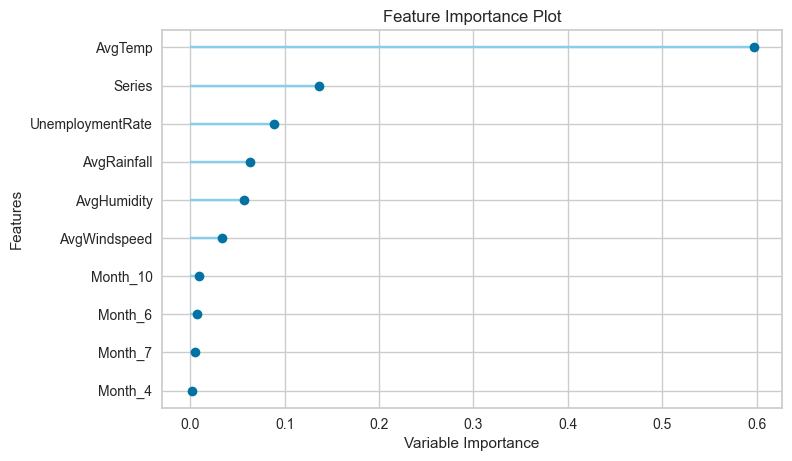

In [122]:
# check feature importance**
plot_model(tuned_test, plot = 'feature')

In [123]:
final_best = finalize_model(tuned_test)

In [124]:
save_model(final_best, 'DemandForecastingModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Series', 'Year',
                                                           'AvgTemp',
                                                           'AvgHumidity',
                                                           'AvgWindspeed',
                                                           'AvgRainfall',
                                                           'UnemploymentRate'],
                                       target='Demand', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy=...
                                            learning_rate=0.3, loss='ls',
                                        

Model Explainability

In [126]:
saved_model=load_model("DemandForecastingModel")

Transformation Pipeline and Model Successfully Loaded


In [127]:
train_pipe = saved_model[:-1].transform(train)
saved_model.named_steps['trained_model']
explainer = shap.TreeExplainer(saved_model.named_steps['trained_model'],train_pipe)
shap_values = explainer.shap_values(train_pipe)
house_idx = 0
shap.force_plot(explainer.expected_value, shap_values[house_idx,:], train_pipe.iloc[house_idx,:])

In [128]:
shap.force_plot(explainer.expected_value, shap_values, train_pipe)

In [121]:
evaluate_model(tuned_test)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [99]:
!mlflow ui

^C
